In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("C:/Users/Keo/Downloads/Data science honours/passengers.csv", low_memory=False)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
columns_to_check = ['Survived','Sex', 'SibSp','Pclass','Parch' ,'Embarked']

# Print unique values for the selected columns
for column in columns_to_check:
    unique_values = df[column].unique()
    print(f"Column '{column}' has {len(unique_values)} unique value(s): {unique_values}")

Column 'Survived' has 2 unique value(s): [0 1]
Column 'Sex' has 2 unique value(s): ['male' 'female']
Column 'SibSp' has 7 unique value(s): [1 0 3 4 2 5 8]
Column 'Pclass' has 3 unique value(s): [3 1 2]
Column 'Parch' has 7 unique value(s): [0 1 2 5 3 4 6]
Column 'Embarked' has 4 unique value(s): ['S' 'C' 'Q' nan]


In [7]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(df))*100
pd.concat([missing_values, percentage_missing_values], axis = 1, keys= ['Missing values', '% Missing'])

,Missing values,% Missing
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


In [8]:
df = df.drop('Cabin',axis=1)

In [9]:
df = df[df['Embarked'].notna()]
print(df.isnull().sum())
df.shape

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64


(889, 11)

In [10]:
df.loc[:, 'Age'] = df['Age'].fillna(df['Age'].mean())
print(df.isnull().sum())
df.shape

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


(889, 11)

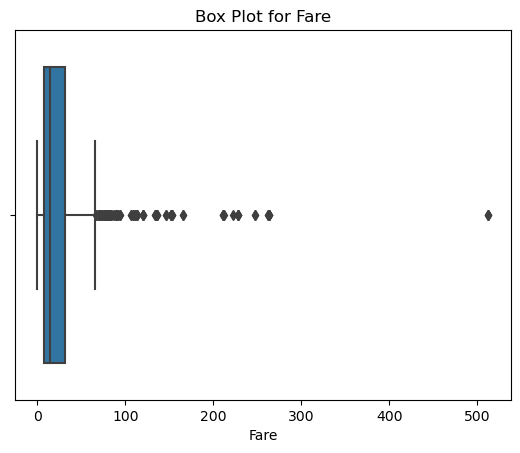

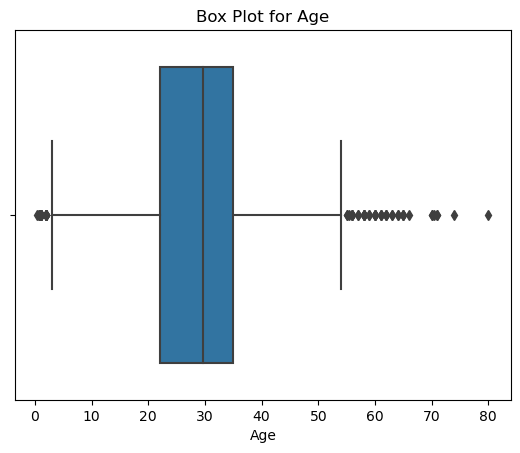

In [11]:
# Box Plots to view distribution

sns.boxplot(x=df['Fare'])
plt.title('Box Plot for Fare')
plt.show()

# .........................

sns.boxplot(x=df['Age'])
plt.title('Box Plot for Age')
plt.show()

In [12]:
#Data preparation

In [13]:
#encode sex column
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


In [14]:
# Converting the 'Age' column from float to integer
df['Age'] = df['Age'].astype(int)
df.head()
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age              int32
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [15]:
#Min-max normalization
scaler = MinMaxScaler()
df[['Fare', 'Age']] = scaler.fit_transform(df[['Fare', 'Age']])

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,0.2750,1,0,A/5 21171,0.014151,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.4750,1,0,PC 17599,0.139136,C
2,3,1,3,"Heikkinen, Miss. Laina",1,0.3250,0,0,STON/O2. 3101282,0.015469,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.4375,1,0,113803,0.103644,S
4,5,0,3,"Allen, Mr. William Henry",0,0.4375,0,0,373450,0.015713,S


In [17]:
df.to_csv("clean_passengers.csv", index=False)

print("Saved succesfully")

Saved succesfully
